In [3]:
import rasterio 
from pathlib import Path
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
result_dirs = [p.path for p in 
               os.scandir("/scratch/ewalt/pdm/rs-uncertainty/results/cloud_exp/2023-06-19_19-46-00")]

In [5]:
result_dirs[0]

'/scratch/ewalt/pdm/rs-uncertainty/results/cloud_exp/2023-06-19_19-46-00/1023_20180824T105019'

1023_20180824T105019


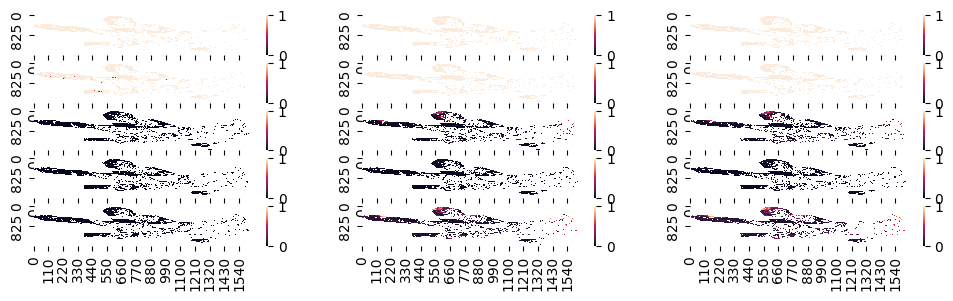

1023_20180523T104019


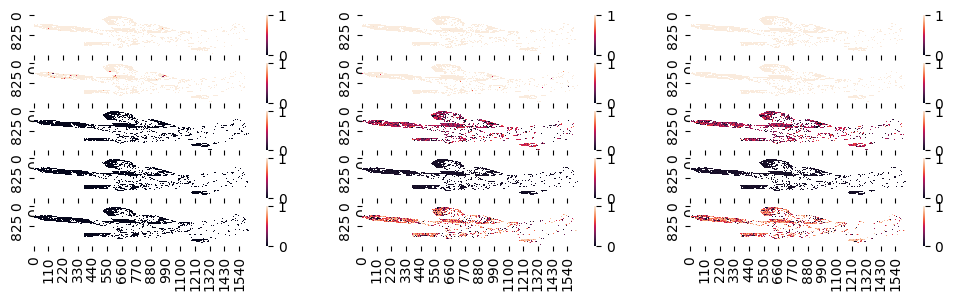

1023_20180610T105031


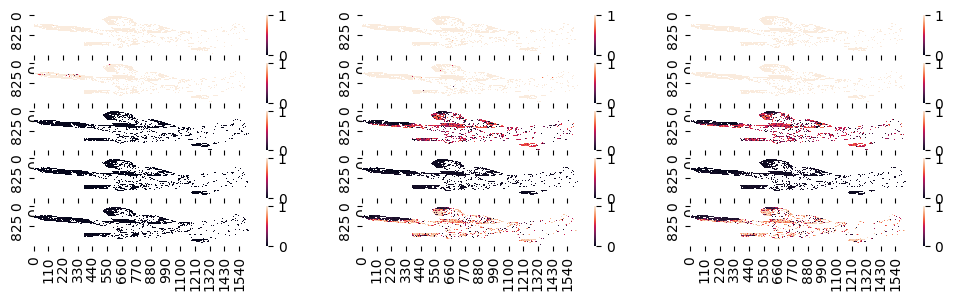

1023_20180503T104019


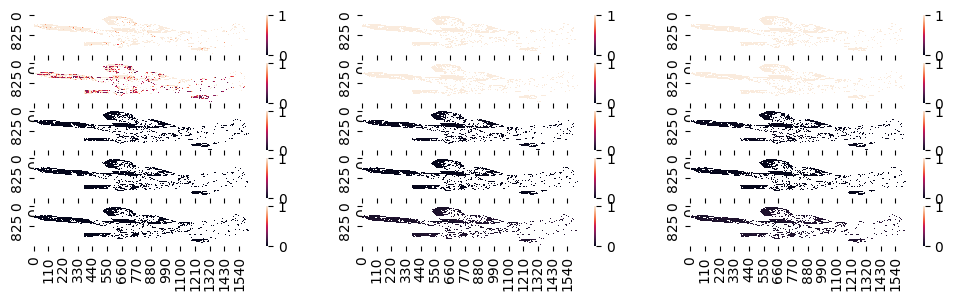

1023_20180908T105021


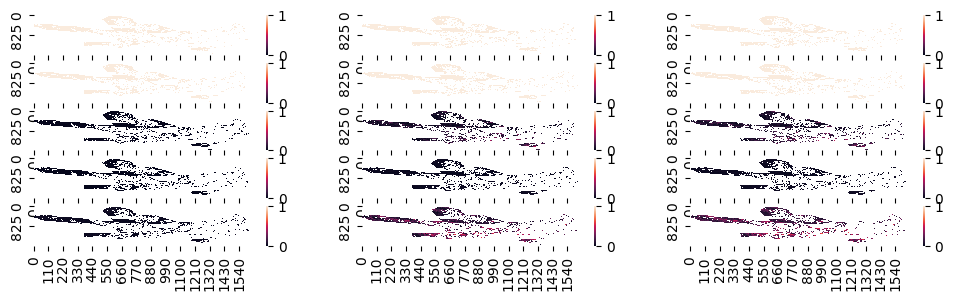

1023_20180531T105031


In [ ]:
for i, d in enumerate(result_dirs):
    alp = os.path.join(d, "1023_aleatoric.tif")
    epp = os.path.join(d, "1023_epistemic.tif")
    prd = os.path.join(d, "1023_variance.tif")
    if not all([os.path.exists(p) for p in [alp, epp, prd]]): continue
    print(d.split("/")[-1])
    with rasterio.open(alp) as f: aleatoric = f.read(f.indexes)
    with rasterio.open(epp) as f: epistemic = f.read(f.indexes)  
    with rasterio.open(prd) as f: predictive = f.read(f.indexes)
    fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(12, 3))
    for j in range(5):
        sns.heatmap(aleatoric[j], vmin=0, vmax=1, ax=axs[j,0])
        sns.heatmap(epistemic[j], vmin=0, vmax=1, ax=axs[j,1])
        sns.heatmap(predictive[j], vmin=0, vmax=1, ax=axs[j,2])
    plt.show()